In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 21)

import utils.nervousness_comparator as nerv_comparator

import utils.plotter_proof as proof
import utils.calc as calc

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_schedule_filename(prefix: str = "", day: int = 0, data_txt: str = "schedule", suffix: str = "") -> str:
    file_template = "data/{prefix}_{data}_{day:02d}{suffix}.csv"
    if suffix:
        suffix = f"_{suffix}"
    return file_template.format(prefix=prefix,data=data_txt,day=day, suffix=suffix)

In [4]:
df_plan_init =  pd.read_csv(get_schedule_filename("06", day=0, suffix="init"))
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_000,0,0,1126,M0,0,29,29,-1097,0,1097
1,Job_000,1,0,1126,M1,29,78,107,-1019,0,1019
2,Job_000,2,0,1126,M2,107,9,116,-1010,0,1010
3,Job_000,3,0,1126,M3,116,36,152,-974,0,974
4,Job_000,4,0,1126,M4,152,49,201,-925,0,925
...,...,...,...,...,...,...,...,...,...,...,...
565,Job_056,5,4206,5746,M9,4537,76,4613,-1133,0,1133
566,Job_056,6,4206,5746,M5,4613,47,4660,-1086,0,1086
567,Job_056,7,4206,5746,M3,4660,52,4712,-1034,0,1034
568,Job_056,8,4206,5746,M4,4772,90,4862,-884,0,884


In [5]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,0,1126,M9,1105,21,1126,0,0,0
19,Job_001,9,81,1535,M8,1505,30,1535,0,0,0
29,Job_002,9,141,1761,M4,1728,33,1761,0,0,0
39,Job_003,9,192,2060,M5,2017,43,2060,0,0,0
49,Job_004,9,228,1349,M6,1296,53,1349,0,0,0


In [6]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(1, last_planning_start + 1):
        filename = get_schedule_filename(schedule_prefix, day=day_numb)
        df_plan_temp = pd.read_csv(filename)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [8]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [9]:
append_plans_and_last_ops("06_devpen", last_planning_start = 9,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [10]:
df_plan_devpen_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_147,9,11184,13052,M5,12978,43,13021,-31,0,31
1,Job_153,9,11601,13055,M8,13021,30,13051,-4,0,4
6,Job_154,9,11661,13281,M4,13254,33,13287,6,6,0
8,Job_155,9,11712,13580,M5,13537,43,13580,0,0,0
14,Job_157,9,11816,13230,M7,13300,25,13325,95,95,0
...,...,...,...,...,...,...,...,...,...,...,...
629,Job_223,9,16944,18812,M5,18769,43,18812,0,0,0
639,Job_224,9,16950,18071,M6,18018,53,18071,0,0,0
649,Job_225,9,16952,18571,M4,18538,33,18571,0,0,0
659,Job_226,9,17068,18195,M9,18174,21,18195,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [12]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [13]:
append_plans_and_last_ops("06_simple", last_planning_start = 9,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [14]:
df_plan_simple_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_147,9,11184,13052,M5,13009,43,13052,0,0,0
1,Job_153,9,11601,13055,M8,13025,30,13055,0,0,0
4,Job_154,9,11661,13281,M4,13248,33,13281,0,0,0
6,Job_155,9,11712,13580,M5,13537,43,13580,0,0,0
9,Job_157,9,11816,13230,M7,13205,25,13230,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Job_223,9,16944,18812,M5,18769,43,18812,0,0,0
638,Job_224,9,16950,18071,M6,18018,53,18071,0,0,0
648,Job_225,9,16952,18571,M4,18538,33,18571,0,0,0
658,Job_226,9,17068,18195,M9,18174,21,18195,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

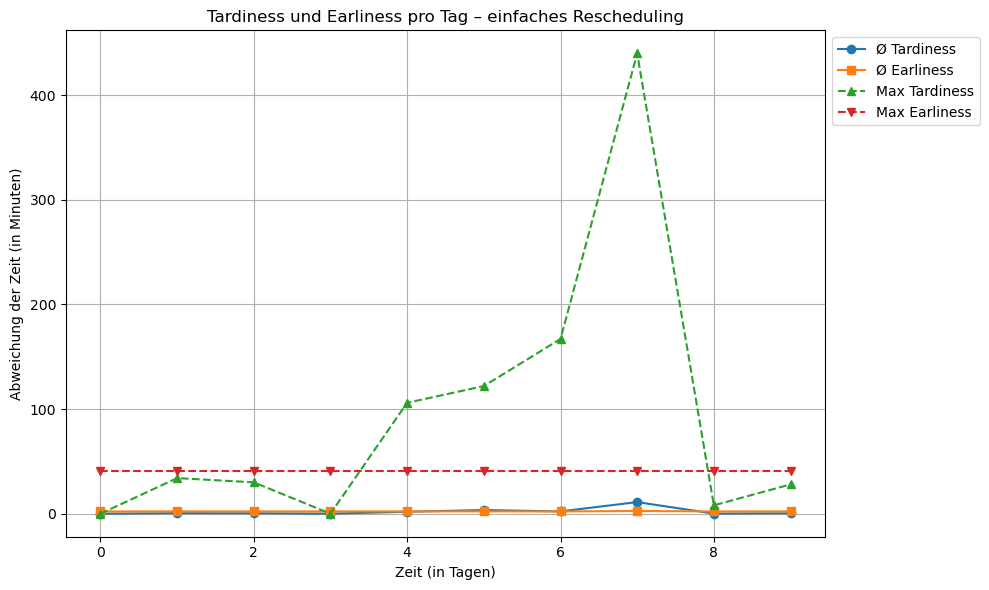

In [17]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


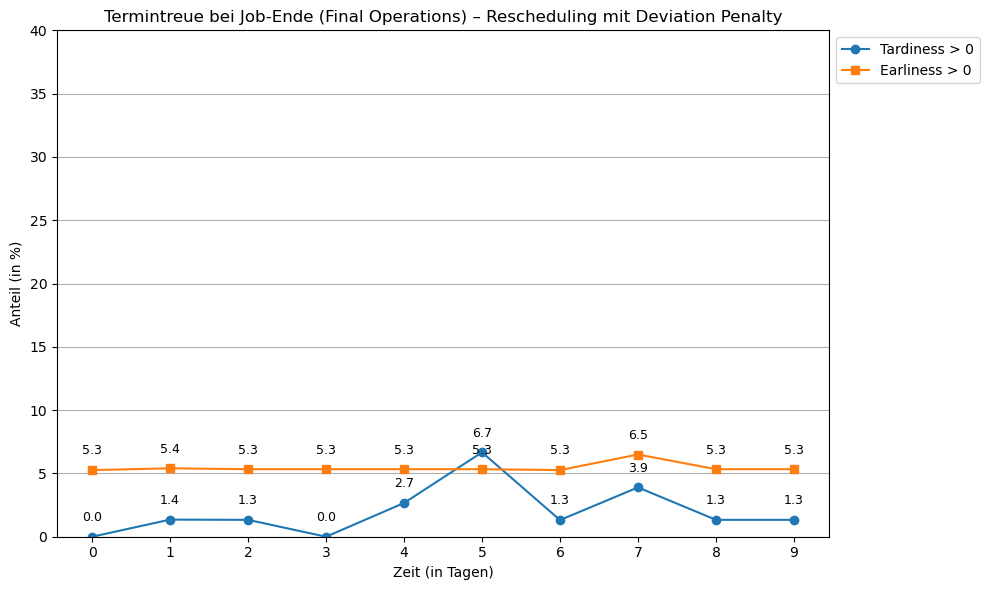

In [18]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)

### b) Mit Deviation Penalty

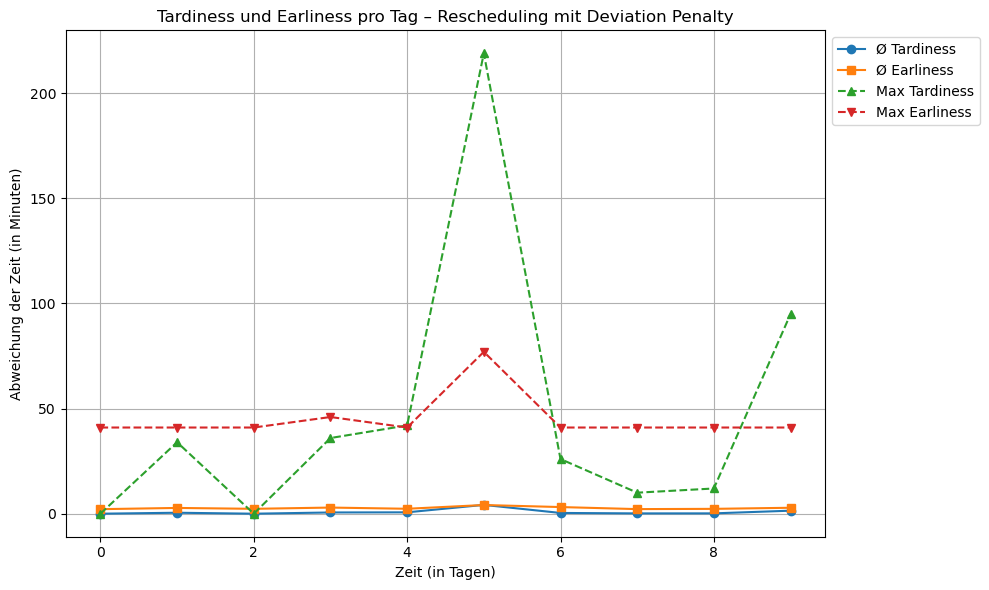

In [20]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


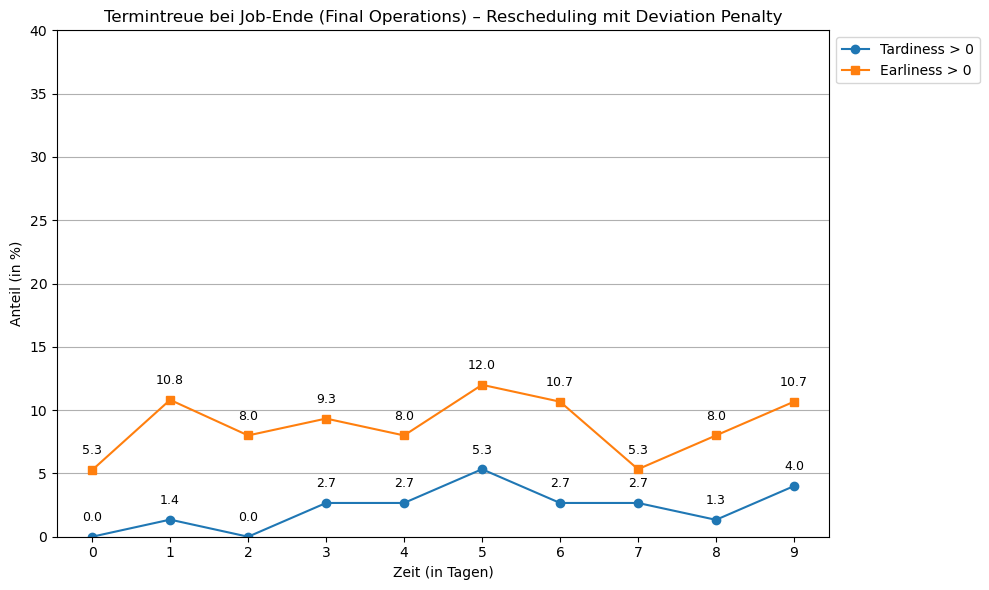

In [21]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

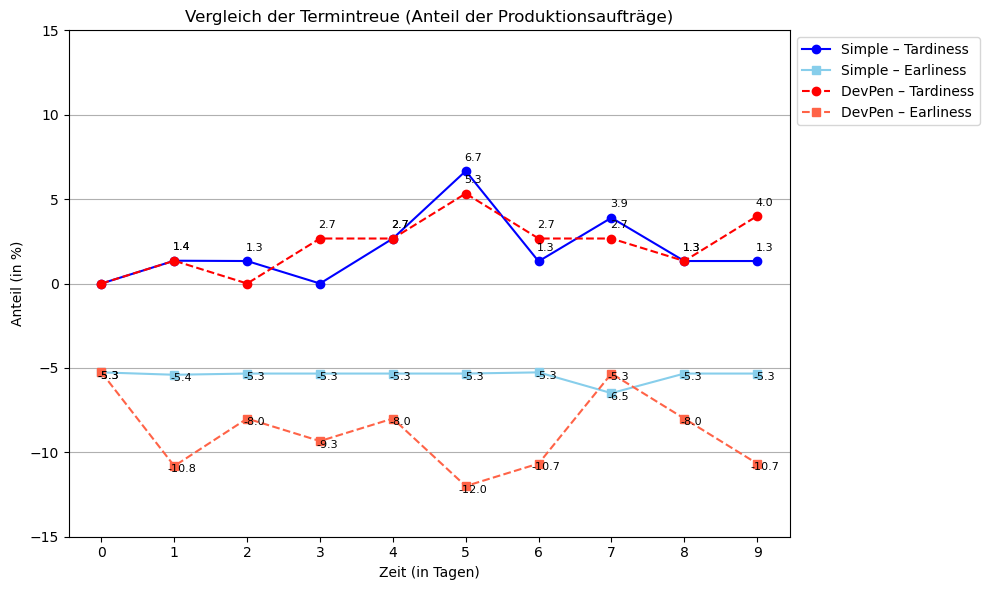

In [23]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-15,
    y_lim_max=15,
    as_percentage=True
)


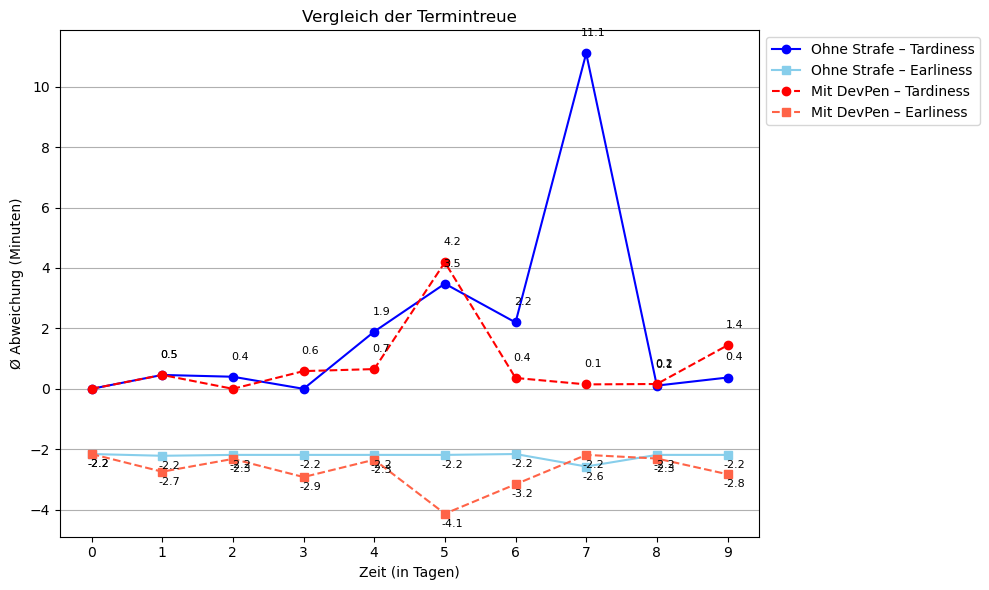

In [55]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

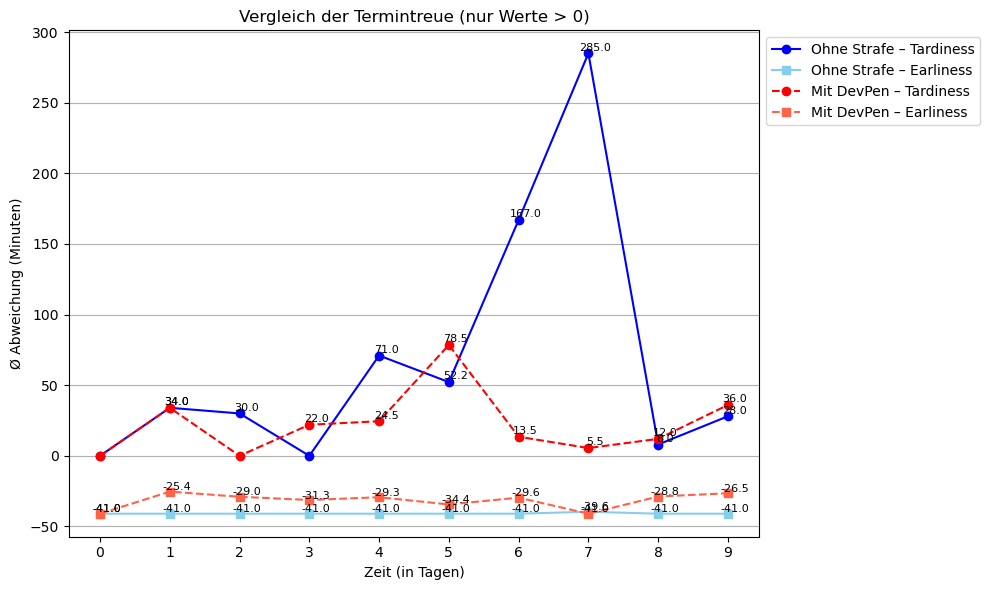

In [24]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [27]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0, 53841, 38590, 39798, 64284, 64602, 57468, 58731, 39560, 59571]

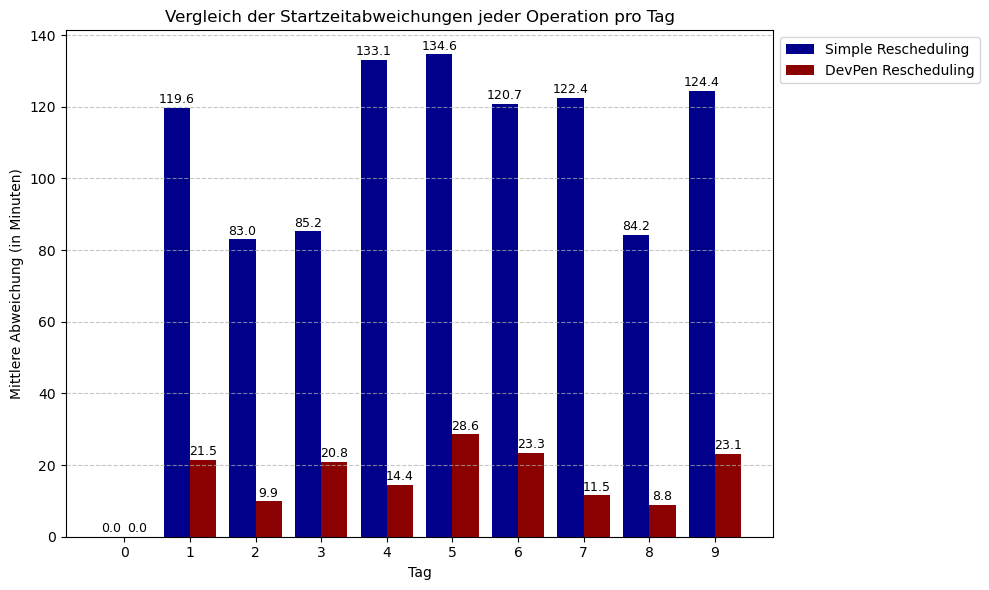

In [28]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [30]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

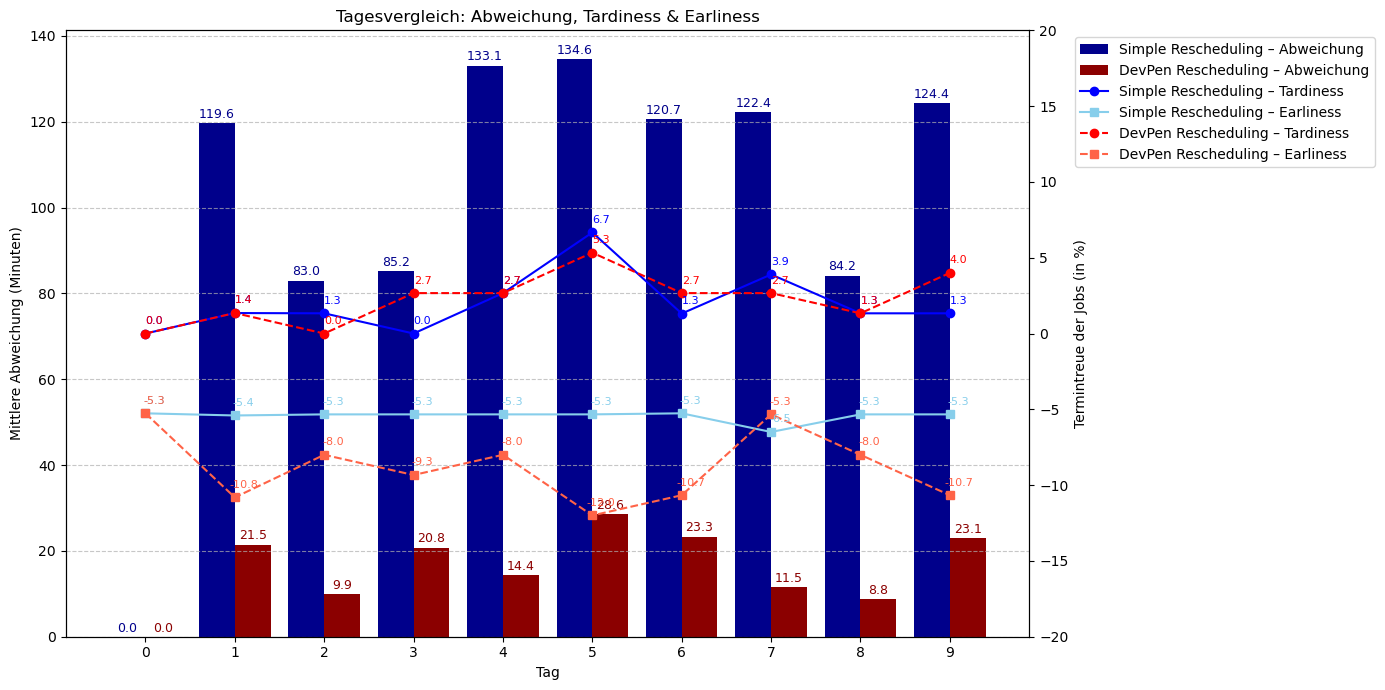

In [31]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=20
)
